- Name: Anisha Ganguly
- NUID:001408910
- Course: INFO 7390

# Kickstarter Project

![title](kickstarterimage.png)

Kickstarter is a public-benefit corporation based in Brookline, New York, that nurtures a global crowdfunding platform focused on creativity. The company's stated mission is to "help bring creative projects to life". It is a crowdfunding platform with over 390k projects and more than 3.6 billion dollars pledges from 2009 to 2018. Project creaters choose deadline and minimum funding goal. If the project goal is not met, there is no funding.

## Abstract

The main objective of this project is to puredict the succfulness of kickstarter project using Classification Analysis to build predictive models to predict how successful the project is and determine what features best contributes to the accuracy of the model. We will play around with Data Analysis and Feature Selection, Model accuracy techniques to determine the best model and feature best used for predicting success.

## About the Dataset

The dataset was obtained from Kaggle: https://www.kaggle.com/kemical/kickstarter-projects

Dataset: The dataset consists of 300k projects consisting of the following features:
- ID: internal kickstarter id
- name: name of the project-- A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
- category: category
- main_category: category of campaign
- currency:currency used to support
- deadline: deadline for crowdfunding
- goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
- launched: date launched
- pledged: amount pledged by "crowd"
- state: Current condition the project is in
- backers: number of backers
- country: country pledged from
- usd pledged: amount of money pledged
- usd_pledged_real: Pledged amount in USD 
- usd_goal_real: Goal amount in USD

The kernal contains two datasets:
The ks-projects-201612 data file is contained by the ks-projects-201801. We will use the ks-projects-201801 for further exploration.

## Load Data and Modules


In [1]:
#Import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#imports for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

import lightgbm as lgb
from lightgbm import LGBMClassifier

Import and proccess the data

In [3]:
#importing and reading the data
kick = pd.read_csv('ks-projects-201801.csv')

In [4]:
#Lets have a look at the data
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
#getting the dimensions of the dataset
print("Dimensions of the dataset:",kick.shape)

Dimensions of the dataset: (378661, 15)


The dataset consists of 378661 rows and 15 features

In [6]:
#getting the basic short summeries about the data
kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
#getting the columns and data types information
kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


From the above analysis we can get the following information:
- The numerical data fields are: id, goal, pledged, backers, usd_pledged, usd_pledged_real,usd_goal_real
- The number of ID is equal to the number of rows

In [8]:
#checking for null values
kick.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

The number of missing values is calculated and it can be noted that the feature 'name' has 4 missing values and 'usd pledged ' has 3797 missing values

In [9]:
#getting the names of columns
kick.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [10]:
kick.get_dtype_counts()

float64    5
int64      2
object     8
dtype: int64

In [11]:
print("Number of projects:", str(len(kick.index)))

Number of projects: 378661


In [12]:
# remove rows with missing values
kick.dropna(inplace=True)

In [13]:
#checking for missing values again
kick.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [14]:
# number of unique values per column, sorted by descending order
kick.T.apply(lambda x: x.nunique(), axis=1)

ID                  374860
name                372068
category               159
main_category           15
currency                14
deadline              3164
goal                  8312
launched            374298
pledged              61936
state                    5
backers               3963
country                 22
usd pledged          95454
usd_pledged_real    105383
usd_goal_real        50032
dtype: int64

### Analyze Data (EDA)

### State

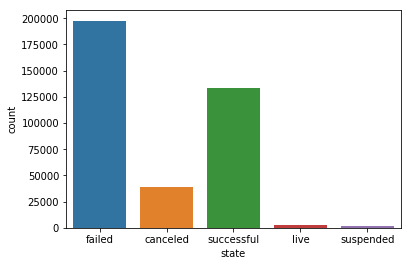

In [15]:
sns.countplot(x= 'state', data = kick)

Here we can see the various data present in the state column such as 'failed', 'cancelled','successful','live','undefined' and 'suspended'. We can also conclude that there are a lot of failed projects and fewer successful projects and also quite a bit of cancelled projects

In [16]:
##Calculate frequency of the categorical feature with % and count base.Sorted on the descending order.
    

def categorical_with_count(kick, feature):
    
    
    # calculate frequency on % and value
    freq = pd.concat([kick[feature].value_counts(normalize=True) * 100,
                             kick[feature].value_counts(normalize=False)], axis=1)
    # rename columns
    freq.columns = [feature + '_%', feature + '_count']
    return freq

In [17]:
categorical_with_count(kick, 'state')

,state_%,state_count
failed,52.715947,197611
successful,35.706931,133851
canceled,10.339060,38757
live,0.746412,2798
suspended,0.491650,1843


Based on the above table we can observe non-uniform distribution of the states. There are 6 states, where failed and successful in total contain 88% of all projects. For the further analysis we will keep only these two classes. We end up with binary classification problem.

In [18]:
# keep `failed` and `successful` states
kick.query("state in ['failed', 'successful']", inplace=True)

In [19]:
# class balance of the dataframe
categorical_with_count(kick, 'state')

,state_%,state_count
failed,59.617995,197611
successful,40.382005,133851


### Main Category

In [20]:
# frequency of the main category
categorical_with_count(kick, 'main_category')

,main_category_%,main_category_count
Film & Video,17.046600,56503
Music,13.817874,45801
Publishing,10.683879,35413
Games,8.604305,28520
Technology,8.159608,27046
Art,7.735427,25640
Design,7.651858,25363
Food,6.653553,22054
Fashion,5.965691,19774
Theater,3.089947,10242


We can tell that 'Film & Video' and 'Music' take up 30% of the observation

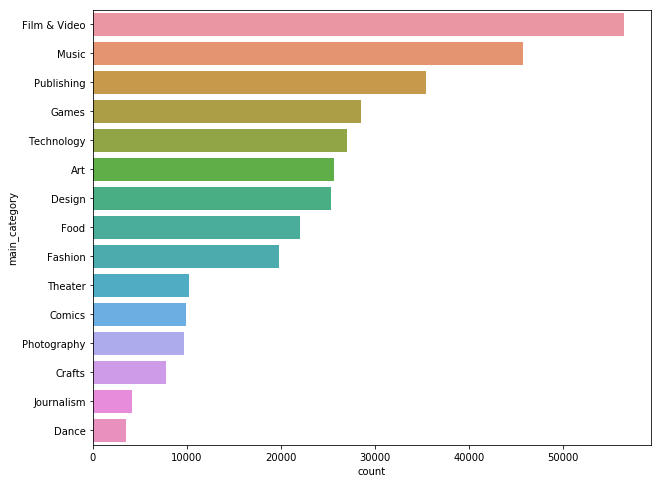

In [21]:
# change dimension of the plot
dims = (10, 8)
fig, ax = plt.subplots(figsize = dims)


# barplot of the main categories by descending order
sns.countplot(
    y=kick.main_category,
    order = kick['main_category'].value_counts().index
)

### Country

In [22]:
# top 10 the countries the projects have come from
categorical_with_count(kick, 'country').head(n=10)

,country_%,country_count
US,78.850064,261358
GB,8.885785,29453
CA,3.731951,12370
AU,1.996006,6616
DE,1.036620,3436
FR,0.760268,2520
NL,0.727384,2411
IT,0.714712,2369
ES,0.565072,1873
SE,0.455256,1509


About 78% of the projects are from US followed by Great Britain and Canada. We can segregate the countries as USA and others.

### Currency


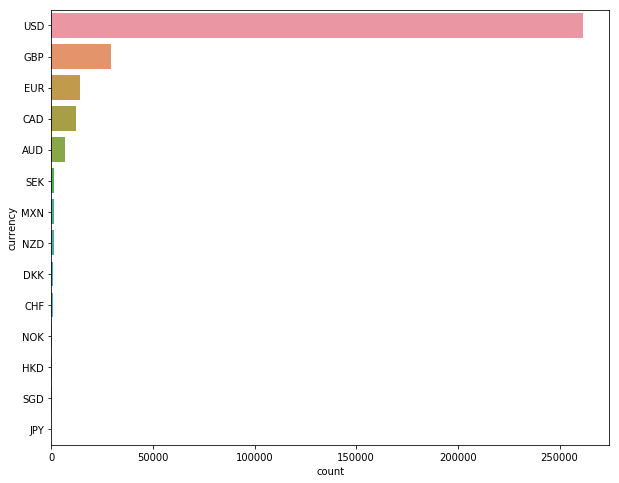

In [23]:
# change dimension of the plot
dims = (10, 8)
fig, ax = plt.subplots(figsize = dims)


# barplot of the currency by descending order
sns.countplot(
    y=kick.currency,
    order = kick['currency'].value_counts().index
)

Most of the currency is from the US, the currency is by country eg: USD is US dollar, GBP is Great Britain Pound and EUR is Eupropean Euros. So USD, GBP, EUR and CAD are the top currencies.

### Goal

In [24]:
#use_goal_real
kick.usd_goal_real.describe()

count    3.314620e+05
mean     4.152286e+04
std      1.109279e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

The decriptive statistics of goals shows that the it is highly skeweed and that the 75% percentile and max percentile values are high

In [25]:
# calculate frequency of the goal: the most popular goal
categorical_with_count(kick, 'usd_goal_real').head(n=10)

,usd_goal_real_%,usd_goal_real_count
5000.0,6.464693,21428
10000.0,5.536381,18351
1000.0,3.592569,11908
3000.0,3.458315,11463
2000.0,3.258292,10800
15000.0,3.025385,10028
2500.0,2.685376,8901
20000.0,2.655810,8803
500.0,2.393940,7935
1500.0,2.233439,7403


We can observe that the most popular amount for goal money are 5k and 10k projects.

From the distribution of goal variable we can observe that the distribution is highly skeweed on the right. The log transformation can fix outliers problem.

C:\anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


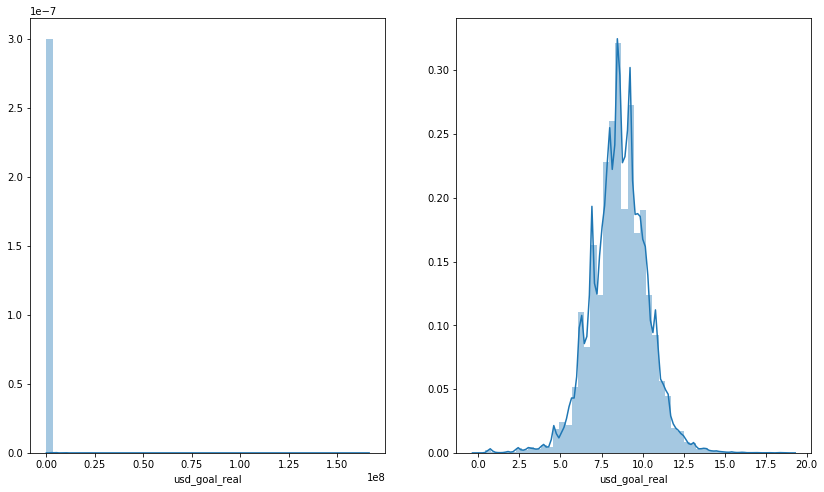

In [26]:
# combine different plots into one: goal and log(goal)
dims = (14, 8)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(kick.usd_goal_real, ax=ax1)
sns.distplot(np.log1p(kick.usd_goal_real), ax=ax2)

Distribution of goal

## Pledgers

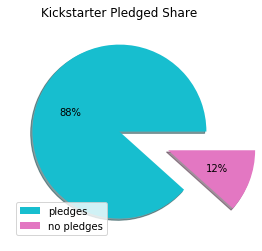

In [27]:
fig, ax = plt.subplots(1, 1)
(kick.usd_pledged_real > 0).value_counts().plot.pie(autopct='%0.0f%%', 
                                             explode=[0,.6], 
                                             labels=None, 
                                             shadow=True, 
                                             colors=['#17becf', '#e377c2'])

plt.ylabel('')
plt.title('Kickstarter Pledged Share')
plt.legend(['pledges', 'no pledges'], loc=3)

plt.show()

## Backers

In [28]:
df1 = kick[(kick.backers >= 1)]

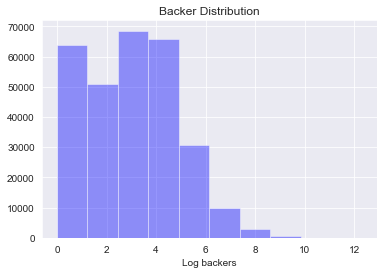

In [29]:
sns.set_style('darkgrid')
sns.distplot(np.log(df1.backers), color='blue', kde=False, bins=10)

plt.title('Backer Distribution')
plt.xlabel('Log backers')
plt.show()

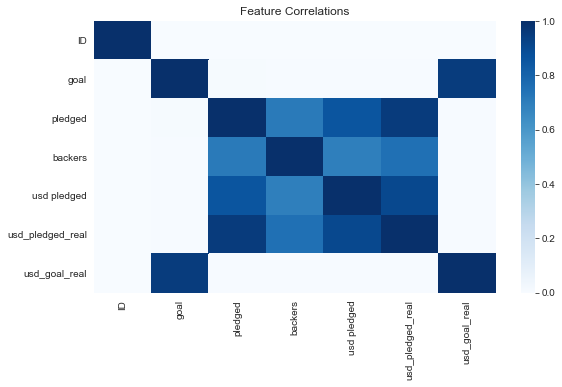

In [30]:
plt.figure(figsize= (9,5))
sns.heatmap(kick.corr(), cmap = 'Blues')
plt.title('Feature Correlations')
plt.show()

In [31]:
kick.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001900,0.000852,0.000835,-0.000289,0.000288,0.001845
goal,0.001900,1.000000,0.007962,0.004792,0.006416,0.005949,0.952614
pledged,0.000852,0.007962,1.000000,0.718120,0.857966,0.953465,0.005716
backers,0.000835,0.004792,0.718120,1.000000,0.697493,0.753221,0.005207
usd pledged,-0.000289,0.006416,0.857966,0.697493,1.000000,0.907713,0.006965
usd_pledged_real,0.000288,0.005949,0.953465,0.753221,0.907713,1.000000,0.006349
usd_goal_real,0.001845,0.952614,0.005716,0.005207,0.006965,0.006349,1.000000


## Visulisations

### Determining the most successful categories based on counts

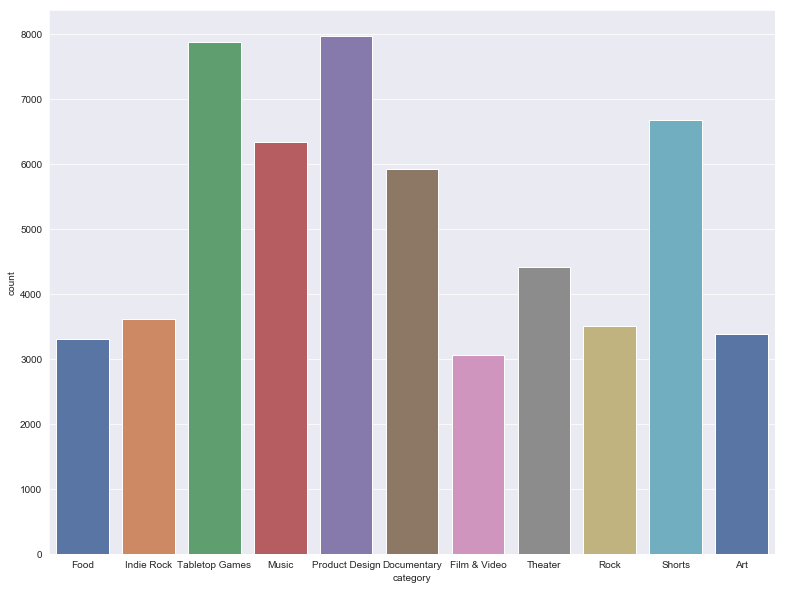

In [32]:
dims = (13, 10)
fig, ax = plt.subplots(figsize = dims)
sns.countplot(x='category', palette="deep",data= kick[kick['state'] == 'successful'].groupby("category")
              .filter(lambda x: len(x) > 3000), ax=ax)

It looks like Product Design, Tabletop Games, Shorts and Documentary category are the most successful categories

## Data Preparation

In [33]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


In [34]:
kick = kick[(kick['state'] == 'failed') | (kick['state'] == 'successful')].copy()
print(kick.shape)

(331462, 15)


In [35]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


In [36]:
#kick.shape()

### We should delete columns we don't want to use

In [37]:
# Delete column => 
# 'ID', 'name', 'category', 'usd pledged', 'usd_pledged_real'

kick = kick.drop('ID', axis =1)
    
kick = kick.drop('name', 1)

#df = df.drop('category', 1)

kick = kick.drop('usd pledged', 1)
    
kick = kick.drop('usd_pledged_real', 1)

kick = kick.drop('backers', 1)

print(kick.shape)

(331462, 10)


In [38]:
kick.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,country,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,US,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,US,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,US,5000.00
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,US,50000.00


In [39]:
# Create new column
# 'duration_days' = 'deadline' - 'launched'

kick['launched'] = pd.to_datetime(kick['launched'])
kick['deadline'] = pd.to_datetime(kick['deadline'])

kick['duration_days'] = kick['deadline'].subtract(kick['launched'])
kick['duration_days'] = kick['duration_days'].astype('timedelta64[D]')

In [40]:
kick.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,country,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,GB,1533.95,58.0
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,US,30000.00,59.0
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,US,45000.00,44.0
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,US,5000.00,29.0
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,US,50000.00,34.0


C:\anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


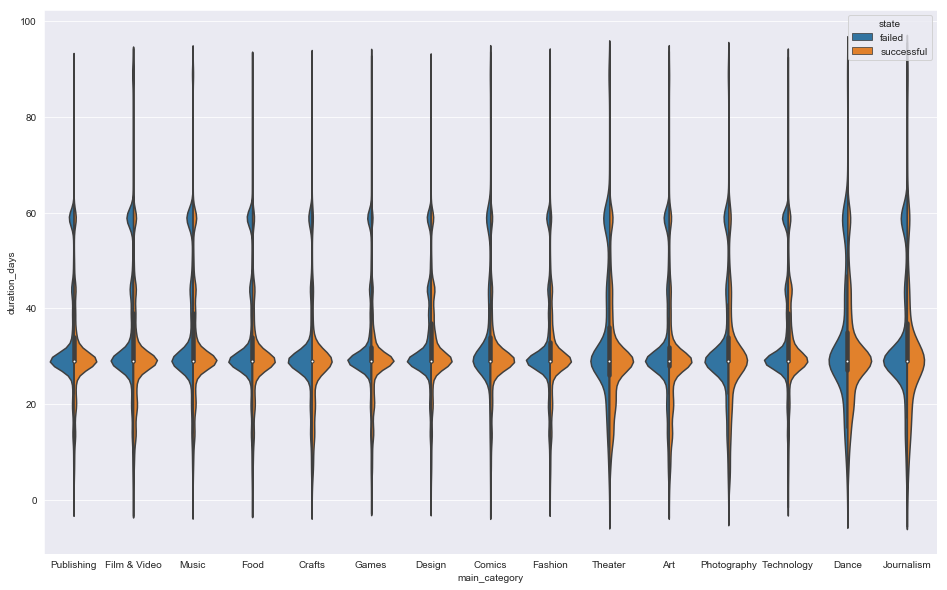

In [41]:
dims = (16, 10)
fig, ax = plt.subplots(figsize = dims)
sns.violinplot(x="main_category", y="duration_days", hue= 'state', data=kick, split=True)

The projects that have longer duration have more failures.

In [42]:
kick = kick.drop('launched', 1)

kick = kick.drop('deadline', 1)

kick = kick.drop('pledged', 1)

In [43]:
kick.head()

,category,main_category,currency,goal,state,country,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,1000.0,failed,GB,1533.95,58.0
1,Narrative Film,Film & Video,USD,30000.0,failed,US,30000.00,59.0
2,Narrative Film,Film & Video,USD,45000.0,failed,US,45000.00,44.0
3,Music,Music,USD,5000.0,failed,US,5000.00,29.0
5,Restaurants,Food,USD,50000.0,successful,US,50000.00,34.0


In [44]:
kick = kick[(kick['usd_goal_real'] <= 100000) & (kick['usd_goal_real'] >= 1000)].copy()
kick.shape

(278137, 8)

In [45]:
kick.head()

,category,main_category,currency,goal,state,country,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,1000.0,failed,GB,1533.95,58.0
1,Narrative Film,Film & Video,USD,30000.0,failed,US,30000.00,59.0
2,Narrative Film,Film & Video,USD,45000.0,failed,US,45000.00,44.0
3,Music,Music,USD,5000.0,failed,US,5000.00,29.0
5,Restaurants,Food,USD,50000.0,successful,US,50000.00,34.0


### One-hot-encoding (changing categorial value to 0/1 value)

In [46]:
# Encoding column 'state',
# failed = 0, successful = 1

kick['state'] = kick['state'].map({
        'failed': 0,
        'successful': 1         
})

In [47]:
print(kick.shape)
kick.head(5)

(278137, 8)


,category,main_category,currency,goal,state,country,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,1000.0,0,GB,1533.95,58.0
1,Narrative Film,Film & Video,USD,30000.0,0,US,30000.00,59.0
2,Narrative Film,Film & Video,USD,45000.0,0,US,45000.00,44.0
3,Music,Music,USD,5000.0,0,US,5000.00,29.0
5,Restaurants,Food,USD,50000.0,1,US,50000.00,34.0


In [48]:
#Using one-hot-encoding for 'category','main_category'
kick = pd.get_dummies(kick, columns = ['category'])

In [49]:
#Using one-hot-encoding for 'main_category'

kick = pd.get_dummies(kick, columns = ['main_category'])

In [50]:
#kick.head()

In [51]:
# Rename 'main_category_Film & Video' to 'main_category_Film'

kick.rename(columns={"main_category_Film & Video": "main_category_Film"}, inplace=True)
#print('DONE')

In [52]:
# Check

print(kick.columns)
print(kick.shape)

Index(['currency', 'goal', 'state', 'country', 'usd_goal_real',
       'duration_days', 'category_3D Printing', 'category_Academic',
       'category_Accessories', 'category_Action',
       ...
       'main_category_Fashion', 'main_category_Film', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'],
      dtype='object', length=180)
(278137, 180)


In [53]:
kick.head()

,currency,goal,state,country,usd_goal_real,duration_days,category_3D Printing,category_Academic,category_Accessories,category_Action,...,main_category_Fashion,main_category_Film,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,GBP,1000.0,0,GB,1533.95,58.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,USD,30000.0,0,US,30000.00,59.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,USD,45000.0,0,US,45000.00,44.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,USD,5000.0,0,US,5000.00,29.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,USD,50000.0,1,US,50000.00,34.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
#df.head()

In [55]:
# use one-hot-coddsing

kick = pd.get_dummies(kick, columns=['country'])

In [56]:
kick.head()

,currency,goal,state,usd_goal_real,duration_days,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,GBP,1000.0,0,1533.95,58.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,USD,30000.0,0,30000.00,59.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,USD,45000.0,0,45000.00,44.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,USD,5000.0,0,5000.00,29.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,USD,50000.0,1,50000.00,34.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
# We use one-hot-codding for currency

kick = pd.get_dummies(kick, columns = ['currency'])

In [58]:
print(kick.columns)
print(kick.shape)

Index(['goal', 'state', 'usd_goal_real', 'duration_days',
       'category_3D Printing', 'category_Academic', 'category_Accessories',
       'category_Action', 'category_Animals', 'category_Animation',
       ...
       'currency_EUR', 'currency_GBP', 'currency_HKD', 'currency_JPY',
       'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK',
       'currency_SGD', 'currency_USD'],
      dtype='object', length=214)
(278137, 214)


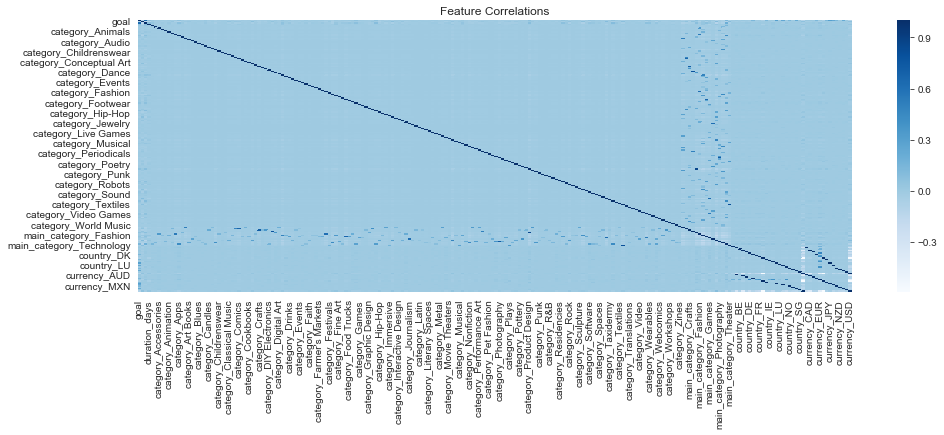

In [59]:
plt.figure(figsize= (16,5))
sns.heatmap(kick.corr(), cmap = 'Blues')
plt.title('Feature Correlations')
plt.show()

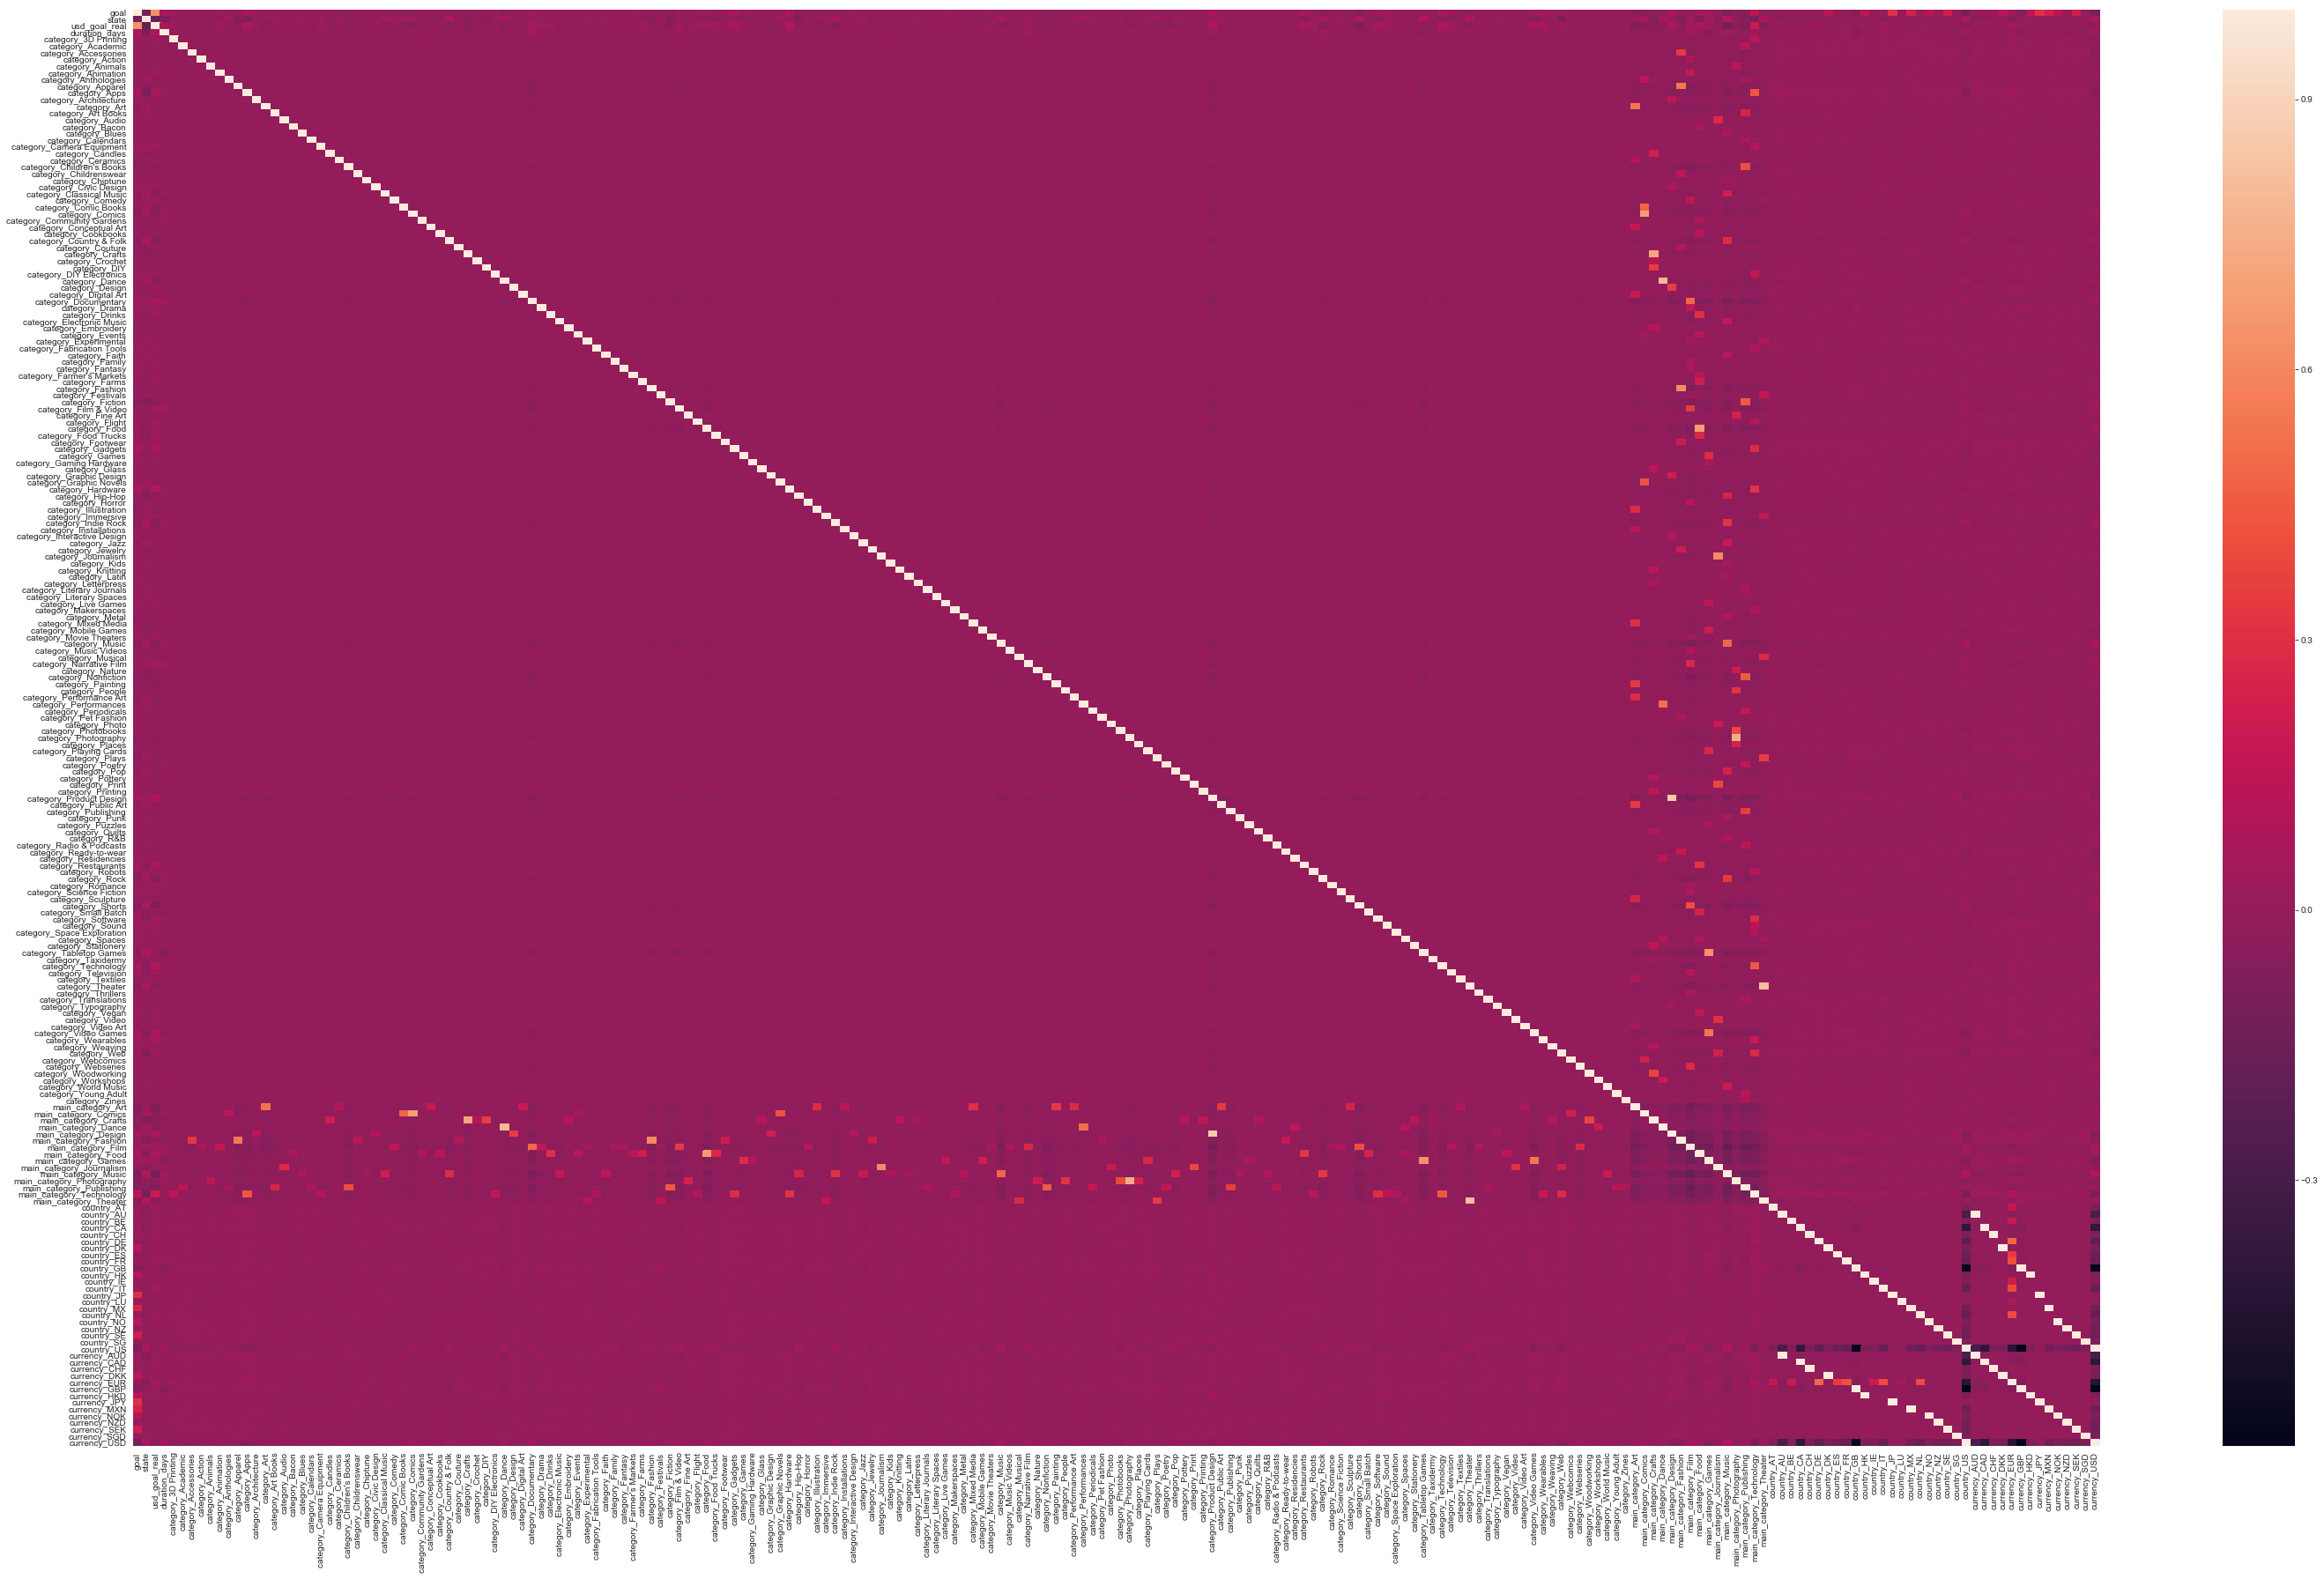

In [60]:
corr = kick.corr()
dims = (50, 30)
fig, ax = plt.subplots(figsize = dims)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax = ax)

In [61]:
kick.head()

,goal,state,usd_goal_real,duration_days,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000.0,0,1533.95,58.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0,0,30000.00,59.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,0,45000.00,44.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,0,5000.00,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,1,50000.00,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Preparing for Modelling

In [62]:
y = kick['state']

X =  kick.drop('state', 1)

In [63]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.1,random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(250323, 213) (250323,)
(27814, 213) (27814,)


# Model Building and Evaluation

## Logistic Regression

In [64]:
#create the Logistic Regression object
logreg = LogisticRegression()

#train models using training sets
logreg.fit(X_train, Y_train)

#make predictions on the testing sets
Y_pred_log = logreg.predict(X_test)

C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Getting the confusion matrix and classification report to evaluate the accuracy of the classification

In [65]:
print(classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76     16975
           1       0.00      0.00      0.00     10839

   micro avg       0.61      0.61      0.61     27814
   macro avg       0.31      0.50      0.38     27814
weighted avg       0.37      0.61      0.46     27814



C:\anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
print('Test')
print('Accuracy',accuracy_score(Y_pred_log,Y_test))

print('Precision of 0:',precision_score(Y_test,Y_pred_log,pos_label=0))
print('Precision of 1:',precision_score(Y_test,Y_pred_log,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,Y_pred_log,pos_label=0))
print('Recall of 1:',recall_score(Y_test,Y_pred_log,pos_label=1))

print('Recall',recall_score(Y_pred_log,Y_test))
print('--------------------------')
#print('Train')
#print('Accuracy',accuracy_score(X_train,Y_train))

Test
Accuracy 0.6103041633709643
Precision of 0: 0.6103041633709643
Precision of 1: 0.0


Recall of 0: 1.0
Recall of 1: 0.0
Recall 0.0
--------------------------


C:\anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [67]:
##accuracy rounded in percentage
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

61.03

The accuracy of the model is coming up to 60.9% with Logistic Regression

In [68]:
#confusion matrix
print('\nConfusion matrix')
print(confusion_matrix(Y_test, Y_pred_log))


Confusion matrix
[[16975     0]
 [10839     0]]


### Which features contribute to the successfulness of the project?

In [69]:
coeff_df = pd.DataFrame(kick.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
172,main_category_Music,0.000090
139,category_Tabletop Games,0.000063
176,main_category_Theater,0.000043
132,category_Shorts,0.000032
144,category_Theater,0.000030
75,category_Indie Rock,0.000026
168,main_category_Film,0.000025
163,main_category_Comics,0.000024
116,category_Product Design,0.000024
33,category_Country & Folk,0.000022


The features are sorted in Ascending order and the ones showing a positive correlation are the most important features we can see that maincategory_Music, category_Tabletop Games, main_category_Theater, category_Shorts etc are the best features and duration_days makes the least impact. 	

In [70]:
from_largest = np.argsort(logreg.coef_)[0][::-1]
positive_coef_inds = []
for index in from_largest:
    if logreg.coef_[0][index] > 0:
        positive_coef_inds.append(index)
    else:
        break
print(X_train.iloc[:, positive_coef_inds].columns)

Index(['main_category_Music', 'category_Tabletop Games',
       'main_category_Theater', 'category_Shorts', 'category_Theater',
       'category_Indie Rock', 'main_category_Film', 'main_category_Comics',
       'category_Product Design', 'category_Country & Folk', 'category_Music',
       'main_category_Games', 'main_category_Design', 'main_category_Dance',
       'category_Rock', 'category_Documentary', 'category_Classical Music',
       'category_Dance', 'category_Jazz', 'category_Narrative Film',
       'category_Comics', 'category_Art Books', 'category_Public Art',
       'category_Comic Books', 'category_Graphic Novels', 'category_Hardware',
       'category_Pop', 'currency_USD', 'country_US', 'category_Performances',
       'category_Plays', 'category_Anthologies', 'category_Wearables',
       'category_World Music', 'category_Musical', 'category_Sound',
       'category_Gadgets', 'category_Festivals', 'category_Webcomics',
       'category_Playing Cards', 'category_Illustration'

### Which feature has the largest impact on failing?

In [71]:
print(X_train.iloc[:, np.argmin(logreg.coef_[0])].name)

duration_days


Now, let us have a look at a feature, which had the lowest coefficient, so contributed the most for a project to fail.

The longer the duration day, more likely that the project is going to fail.

## Random Forest 

In [72]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
y_pred_rf = random_forest.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)

In [73]:
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

64.89

In [74]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73     16975
           1       0.56      0.48      0.51     10839

   micro avg       0.65      0.65      0.65     27814
   macro avg       0.63      0.62      0.62     27814
weighted avg       0.64      0.65      0.64     27814



In [75]:
print("Test")
print('Accuracy:',accuracy_score(Y_test,y_pred_rf))
print('\n')
print('Precision of 0:',precision_score(Y_test,y_pred_rf,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_rf,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_rf,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_rf,pos_label=1))

print("------------------------")
print("Train")
print('Accuracy:',accuracy_score(Y_train,y_pred_train_rf))

Test
Accuracy: 0.6489178111742288


Precision of 0: 0.6943815377979079
Precision of 1: 0.5579413034095814


Recall of 0: 0.7586450662739322
Recall of 1: 0.4770735307685211
------------------------
Train
Accuracy: 0.8359479552418275


In [76]:
conf_matrix = confusion_matrix(Y_test, y_pred_rf)
conf_matrix

array([[12878,  4097],
       [ 5668,  5171]], dtype=int64)

## Naive Bayes

In [77]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,Y_train)
y_pred_naive = naive_bayes.predict(X_test)
y_pred_train_naive = naive_bayes.predict(X_train)

In [78]:
print('Test')
print('Accuracy',accuracy_score(y_pred_naive,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_naive,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_naive,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_naive,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_naive,pos_label=1))

print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_naive,Y_train))

Test
Accuracy 0.5117926224203638
Precision of 0: 0.7441760138050043
Precision of 1: 0.4343240651965484


Recall of 0: 0.30486008836524303
Recall of 1: 0.835870467755328
--------------------------
Train
Accuracy 0.5186379198076085


In [79]:
acc_naive_bayes = round(naive_bayes.score(X_test, Y_test) * 100, 2)
acc_naive_bayes

51.18

In [80]:
conf_matrix = confusion_matrix(Y_test, y_pred_naive)
conf_matrix

array([[ 5175, 11800],
       [ 1779,  9060]], dtype=int64)

## Evaluating the models

AUC for  Random Forest  =  0.6178592985212267
AUC for  Logistic Regression  =  0.5
AUC for  Naive Bayes  =  0.5703652780602855


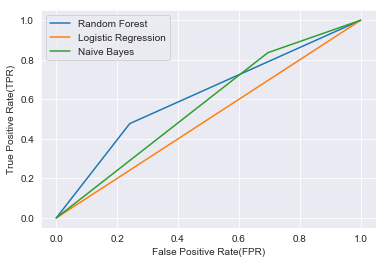

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifier_predictions = [y_pred_rf,Y_pred_log,y_pred_naive]
classifier_names = ["Random Forest","Logistic Regression",'Naive Bayes']
for i in range(len(classifier_predictions)):
    fpr,tpr,thresholds = roc_curve(Y_test,classifier_predictions[i])
    plt.plot(fpr,tpr,label= classifier_names[i])
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.legend()
    print("AUC for ",classifier_names[i]," = ",auc(fpr,tpr))

From this we can evaluate that the Random Forest has the best AUC value whereas Logistic Regression has the worst AUC value and has the worst class seperation capabilities as it has an AUC value of 0.5.

Precision Recall score for  Random Forest  =  0.4699612955018286
Precision Recall score for  Logistic Regression  =  0.38969583662903573
Precision Recall score for  Naive Bayes  =  0.42699925491685425


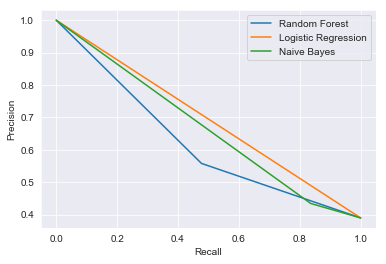

In [82]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

classifier_predictions = [y_pred_rf,Y_pred_log,y_pred_naive]
classifier_names = ["Random Forest","Logistic Regression",'Naive Bayes']

for i in range(len(classifier_predictions)):
    precision, recall, thresholds = precision_recall_curve(Y_test,classifier_predictions[i])
    plt.plot(recall,precision,label= classifier_names[i])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    print("Precision Recall score for ",classifier_names[i]," = ",(average_precision_score(Y_test,classifier_predictions[i])))

In [83]:
# Feature selection and PCA - Simple variance baseline approach

from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

print('there is a high number of variables in the dataset:')
print(kick.shape)

#print("feature selection: remove all features whose variance doesn’t meet some threshold.")
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

print("standardize the remaining features")
dfpca = pd.DataFrame(sel.fit_transform(kick))

from sklearn.decomposition import PCA
print('apply PCA, 4 components')
pca = PCA(n_components = 4) # arbitrary number
principalComponents = pca.fit_transform(dfpca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2','pc3','pc4'])

# Split dataframe into random train and test subsets
Xpca_train, Xpca_test, Ypca_train, Ypca_test = train_test_split(
    principalDf,
    y, 
    test_size = 0.1,
    random_state=42
)

print('PCA reduces the number of variables to:')
print(Xpca_train.shape, Ypca_train.shape)
print(Xpca_test.shape, Ypca_test.shape)
print('done')

there is a high number of variables in the dataset:
(278137, 214)
standardize the remaining features
apply PCA, 4 components
PCA reduces the number of variables to:
(250323, 4) (250323,)
(27814, 4) (27814,)
done


### Random Forest with PCA

In [84]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(Xpca_train, Ypca_train)
y_pred_rf_pca = random_forest.predict(Xpca_test)
y_pred_train_rf_pca= random_forest.predict(Xpca_train)

In [85]:
acc_random_forest_pca = round(random_forest.score(Xpca_test, Ypca_test) * 100, 2)
acc_random_forest_pca

100.0

In [86]:
print(classification_report(Ypca_test, y_pred_rf_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16975
           1       1.00      1.00      1.00     10839

   micro avg       1.00      1.00      1.00     27814
   macro avg       1.00      1.00      1.00     27814
weighted avg       1.00      1.00      1.00     27814



We can see from the analysis and models that we're not getting the best values for accuracy for our prediction models.
A few recommendations could be:
- decrease the number of features(with encoding we got a lot of features but this is likely overfitting our models and validation sets)
- standarize the data set
- use feature engineering and feature selection/regularization techniques
- try hyperparameter tuning
- try with other classification models

Let's try a few of the techniques to see if it helps increase the accuracy of the models.

## With Feature Normalisation

In [87]:
#importing and reading the data
kick_pro = pd.read_csv('ks-projects-201801.csv')

In [88]:
kick_pro.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [89]:
features = ['ID', 'name','deadline',
         'pledged', 'backers', 'country']

In [90]:
kick_pro = kick_pro.drop(features, axis=1)

In [91]:
kick_pro.get_dtype_counts()

object     5
float64    4
dtype: int64

In [92]:
kick_pro.dtypes[kick_pro.dtypes=='O']

category         object
main_category    object
currency         object
launched         object
state            object
dtype: object

In [93]:
cat_features = ['category','main_category','currency','launched']  

In [94]:
#factorizing 
kick_pro[cat_features] = kick_pro[cat_features].apply(lambda x: pd.factorize(x)[0])

In [95]:
kick_pro.head()

,category,main_category,currency,goal,launched,state,usd pledged,usd_pledged_real,usd_goal_real
0,0,0,0,1000.0,0,failed,0.0,0.0,1533.95
1,1,1,1,30000.0,1,failed,100.0,2421.0,30000.00
2,1,1,1,45000.0,2,failed,220.0,220.0,45000.00
3,2,2,1,5000.0,3,failed,1.0,1.0,5000.00
4,3,1,1,19500.0,4,canceled,1283.0,1283.0,19500.00


In [96]:
kick_pro.isna().sum()

category               0
main_category          0
currency               0
goal                   0
launched               0
state                  0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [97]:
kick_pro.dropna(inplace=True)

In [98]:
kick_pro['state'].value_counts()

failed        197614
successful    133851
canceled       38757
live            2798
suspended       1844
Name: state, dtype: int64

In [99]:
index_names = kick_pro[ (kick_pro['state'] == 'canceled') | (kick_pro['state']=='live')|(kick_pro['state']=='suspended')].index
kick_pro.drop(index_names , inplace=True)

In [100]:
kick_pro['state'].value_counts()



failed        197614
successful    133851
Name: state, dtype: int64

In [101]:
kick_pro['state'] = kick_pro['state'].replace(['failed'],0)
kick_pro['state'] = kick_pro['state'].replace(['successful'],1)

In [102]:
kick_pro['state'].value_counts()

0    197614
1    133851
Name: state, dtype: int64

In [103]:
kick_pro.get_dtype_counts()

float64    4
int64      5
dtype: int64

In [104]:
kick_pro.head()

,category,main_category,currency,goal,launched,state,usd pledged,usd_pledged_real,usd_goal_real
0,0,0,0,1000.0,0,0,0.0,0.0,1533.95
1,1,1,1,30000.0,1,0,100.0,2421.0,30000.00
2,1,1,1,45000.0,2,0,220.0,220.0,45000.00
3,2,2,1,5000.0,3,0,1.0,1.0,5000.00
5,4,3,1,50000.0,5,1,52375.0,52375.0,50000.00


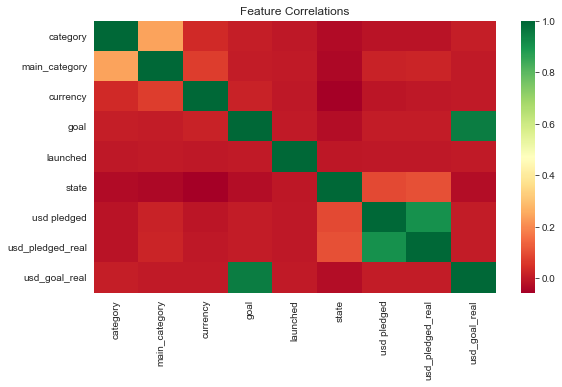

In [105]:
plt.figure(figsize= (9,5))
sns.heatmap(kick_pro.corr(), cmap = 'RdYlGn')
plt.title('Feature Correlations')
plt.show()

In [106]:
X = kick_pro.drop('state',axis=1)
Y = kick_pro['state']
x_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
X_test = sc.transform(X_test)

C:\anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [108]:
random_class = RandomForestClassifier(n_estimators = 8,random_state=2)
random_class.fit(x_train, y_train)
y_pred = random_class.predict(X_test)
y_pred_train = random_class.predict(x_train)


In [109]:
print("Test")
print('Accuracy:',accuracy_score(Y_test,y_pred))
print('\n')
print('Precision of 0:',precision_score(Y_test,y_pred,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred,pos_label=1))

print("------------------------")
print("Train")
print('Accuracy:',accuracy_score(y_train,y_pred_train))

Test
Accuracy: 0.9982019380453016


Precision of 0: 0.9995333833762756
Precision of 1: 0.9962473195139385


Recall of 0: 0.9974490828845609
Recall of 1: 0.9993128790368356
------------------------
Train
Accuracy: 0.9999275939468539


In [110]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[49268   126]
 [   23 33450]]


In [111]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49394
           1       1.00      1.00      1.00     33473

   micro avg       1.00      1.00      1.00     82867
   macro avg       1.00      1.00      1.00     82867
weighted avg       1.00      1.00      1.00     82867



In [112]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_pred_train_log = log_reg.predict(x_train)
print('Test')
print('Accuracy',accuracy_score(y_pred_log,Y_test))

print('Precision of 0:',precision_score(Y_test,y_pred_log,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_log,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_log,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_log,pos_label=1))

print('Recall',recall_score(y_pred_log,Y_test))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_log,y_train))


C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test
Accuracy 0.8933471707676156
Precision of 0: 0.8612684838767147
Precision of 1: 0.9606911770206081


Recall of 0: 0.9787221119974086
Recall of 1: 0.7673647417321423
Recall 0.9606911770206081
--------------------------
Train
Accuracy 0.893426334886041


In [113]:
conf_matrix = confusion_matrix(Y_test, y_pred_log)
print(conf_matrix)

[[48343  1051]
 [ 7787 25686]]


In [114]:
coeff_df1 = pd.DataFrame(kick_pro.columns.delete(0))
coeff_df1.columns = ['Feature']
coeff_df1["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df1.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,launched,1.532912e-06
7,usd_goal_real,-6.627167e-07
0,main_category,-1.854157e-06
6,usd_pledged_real,-2.497340e-06
4,state,-3.389964e-06
5,usd pledged,-3.523640e-06
1,currency,-1.890974e-05
2,goal,-6.214363e-03


In [115]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
y_pred_naive = naive_bayes.predict(X_test)
y_pred_train_naive = naive_bayes.predict(x_train)


In [116]:
print('Test')
print('Accuracy',accuracy_score(y_pred_naive,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_naive,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_naive,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_naive,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_naive,pos_label=1))

print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_naive,y_train))

Test
Accuracy 0.5012731244041657
Precision of 0: 0.9093585058871295
Precision of 1: 0.44620968294186125


Recall of 0: 0.1813783050572944
Recall of 1: 0.9733217817345323
--------------------------
Train
Accuracy 0.503471467992502


In [117]:
conf_matrix = confusion_matrix(Y_test, y_pred_naive)
print(conf_matrix)

[[ 8959 40435]
 [  893 32580]]


AUC for  Random Forest  =  0.9983809809606983
AUC for  Logistic Regression  =  0.8730434268647754
AUC for  Naive Bayes  =  0.5773500433959133


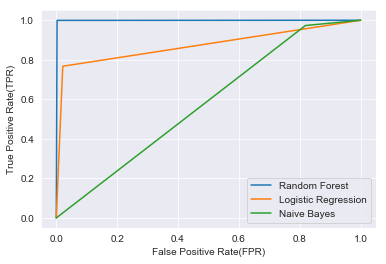

In [118]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifier_predictions = [y_pred,y_pred_log,y_pred_naive]
classifier_names = ["Random Forest","Logistic Regression",'Naive Bayes']
for i in range(len(classifier_predictions)):
    fpr,tpr,thresholds = roc_curve(Y_test,classifier_predictions[i])
    plt.plot(fpr,tpr,label= classifier_names[i])
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.legend()
    print("AUC for ",classifier_names[i]," = ",auc(fpr,tpr))

Precision Recall score for  Random Forest  =  0.9958403302838422
Precision Recall score for  Logistic Regression  =  0.8311703922490833
Precision Recall score for  Naive Bayes  =  0.44508190782646684


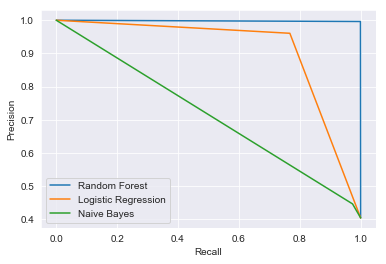

In [119]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

classifier_predictions = [y_pred,y_pred_log,y_pred_naive]
classifier_names = ["Random Forest","Logistic Regression",'Naive Bayes']

for i in range(len(classifier_predictions)):
    precision, recall, thresholds = precision_recall_curve(Y_test,classifier_predictions[i])
    plt.plot(recall,precision,label= classifier_names[i])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    print("Precision Recall score for ",classifier_names[i]," = ",(average_precision_score(Y_test,classifier_predictions[i])))

We can see that standadizing and reducing the number of features greatly increased the model accuracy, precision, recall and AUC values. 

## Conclusion:





From the data set we can see that Random Forest Classifier gave the best result for predicting the accuracy score of 64% and when standadizing the data set we get get an accuracy of 99%.
We removed unnecassary features like name, backers, id etc which would have distorted our model.

We also found out that features like maincategory_Music, category_Tabletop Games, main_category_Theater, category_Shorts etc and goal are most important from the correlation score. It look like projects in the Arts and Entertainment category are more successful and also that what we set as the monetary goal and how long we allow people to pledge for really does matter a lot. 

In the future, we can try to Regularize the models,Feature engineering, Hyperparameter Sweeps,create better Classifiers.



## References:
- https://www.kaggle.com/kemical/kickstarter-projects -used this to get the dateset and data information and referenced kernals and notebooks to get started
- https://www.kaggle.com/dronqo/how-successful-is-your-kickstarter-project used this kernal for reference for EDA
- https://www.kaggle.com/kosovanolexandr/kickstarter-lgbmclassifier-0-681 used this kernal for referencing the various classification examples that could be used and implementing one-hot-coding-analysis
- https://en.wikipedia.org/wiki/Kickstarter -used to reference introduction about Kickstarter Crowdfunding
- https://github.com/varun-jagadeesh/Loan-Prediction-using-Supervised-ML - for ideas about model evaluation curves(ROC, precision etc)
- https://www.kaggle.com/kromel/kickstarter-successful-vs-failed (For feature correlation scores)
- https://www.kaggle.com/kromel/kickstarter-successful-vs-failed (For analysis plots)


### Licence:

Copyright <2020> < Anisha Ganguly >

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

